# 1. 단순 선형 회귀분석 (Simple Linear Regression)
* 종속변수에 영향을 미치는 독립변수가 1개
* 키에 대한 몸무게 예측
* 학습시간에 따른 성적 예측

## 1-2. 학습시간에 따른 성적 예측

### 1) 문제정의
학습시간에 따른 성적 예측하기

### 2) 데이터 수집
* https://www.kaggle.com/shubham47/students-score-dataset-linear-regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ori_data = pd.read_csv('data/01_student_score/student_scores.csv')
data = ori_data.copy()
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 3) 데이터 전처리
* 결측치 처리

In [2]:
data.shape

(25, 2)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 4) 데이터 탐색
* 상관관계
* 산점도(Scatter Plot)

In [5]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


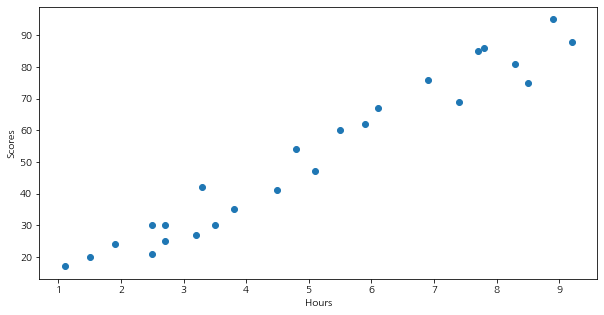

In [6]:
plt.figure(figsize=(10, 5))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(data.Hours, data.Scores)
plt.show()

### 5) 모델 학습
* 데이터 쪼개기
* 선형회귀 학습
* 선형회귀 예측

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
# 입력데이터(독립변수) : Height (2차원)
# 타겟데이터(종속변수) : Weight (1차원)
input_data = data[['Hours']].to_numpy()
target_data = data['Scores'].to_numpy()
input_data, target_data

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test

(array([[7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9],
        [3.8],
        [1.9]]),
 array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
        41], dtype=int64),
 array([20, 27, 69, 30, 62, 35, 24], dtype=int64))

In [10]:
# LinearRegression : 선형회귀 알고리즘을 구현한 클래스
# fit() : 학습, score() : 평가, predict() : 예측
lr = LinearRegression()

In [11]:
# 선형 회귀 모델 학습
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
lr.coef_, lr.intercept_

(array([9.94167834]), 1.932204253151646)

In [13]:
# 선형 회귀 모델 예측
lr.predict([[8]])

array([81.46563097])

In [14]:
# Weight = a * Height + b
9.94167834 * 8 + 1.932204253151646

81.46563097315163

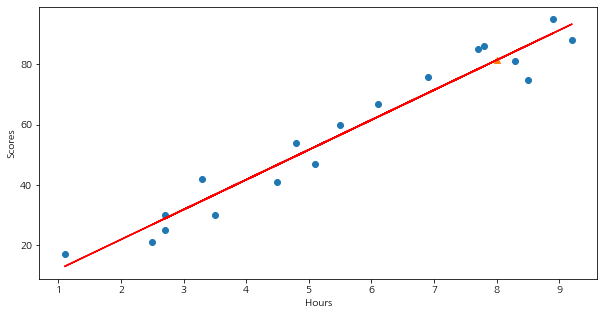

In [15]:
plt.figure(figsize=(10, 5))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color='r')
plt.scatter(8, 81.46, marker='^')
plt.show()

In [17]:
### 6) 모델 평가
y_pred = lr.predict(X_test)
pd.DataFrame({'Hour': X_test[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred})

,Hour,Actual Score,Predicted Score
0,1.5,20,16.844722
1,3.2,27,33.745575
2,7.4,69,75.500624
3,2.5,30,26.786400
4,5.9,62,60.588106
5,3.8,35,39.710582
6,1.9,24,20.821393


In [18]:
lr.score(X_train, y_train)  # 훈련세트

0.9484509249326872

In [19]:
lr.score(X_test, y_test)  # 테스트 세트

0.9367661043365055

In [20]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9367661043365055

In [21]:
y_pred2 = lr.predict(X_train)
metrics.r2_score(y_train, y_pred2)

0.9484509249326872

In [22]:
# R-Sqaured(결정계수), Adj R-Squared(수정된 결정계수)

### 7) 결과 해석 및 문제해결방안 도출
* 훈련세트와 테스트세트 모두 높지 않음
* 과소적합이 되었다고 볼 수 있음
* 직선 형태가 아니라 곡선 형태의 데이터 셋인 경우에는 어떻게 할까?